## Niño Matthew De La Cruz Magsano

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, r2_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn import datasets
from numpy.testing import assert_almost_equal
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  make_scorer

In [26]:
import matplotlib.pyplot as plt 

sns.set_style('whitegrid')
sns.set_palette('Set2')
sns.color_palette('Set2')
dlsu_green = "#117a65ff"

One important function of HR is to retain talent. High employee attrition in a company can result to financial cost, lower morale, decrease in producvity  and more. Therefore it's imperative for HR to be able to maintain a healthy employee attrition rate. With this, HR wants you to build a model that will predict if an employee will attrite (leave the company) or stay. By having this kind of model in the company, HR would be able to proactively retain talent and have a healthier attrition rate. 

They have provided you with a dataset which contains the following columns. Source from <a href="https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists">Kaggle</a>: 

- enrollee_id : Unique ID for candidate
- city: City code
- city_ development _index : Developement index of the city (scaled)
- gender: Gender of candidate
- relevent_experience: Relevant experience of candidate
- enrolled_university: Type of University course enrolled if any
- education_level: Education level of candidate
- major_discipline :Education major discipline of candidate
- experience: Candidate total experience in years
- company_size: No of employees in current employer's company
- company_type : Type of current employer
- lastnewjob: Difference in years between previous job and current job
- training_hours: training hours completed
- target: 0 – Not looking for job change, 1 – Looking for a job change

In [2]:
hr_train_df = pd.read_csv("data/hr_job_datasci_train.csv")
hr_train_df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


The cell below shows you the columns with missing values, # of missing values and the unique values for each column.

In [3]:
columns_with_null = hr_train_df.columns[hr_train_df.isna().any()]
display(hr_train_df[columns_with_null].isnull().sum()/hr_train_df.shape[0])
display(hr_train_df[columns_with_null])
for c in columns_with_null:
    print(f"{c} {hr_train_df[c].unique()}")

gender                 0.235306
enrolled_university    0.020148
education_level        0.024011
major_discipline       0.146832
experience             0.003393
company_size           0.309949
company_type           0.320493
last_new_job           0.022080
dtype: float64

,gender,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,Male,no_enrollment,Graduate,STEM,>20,NaN,NaN,1
1,Male,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4
2,NaN,Full time course,Graduate,STEM,5,NaN,NaN,never
3,NaN,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never
4,Male,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4
...,...,...,...,...,...,...,...,...
19153,Male,no_enrollment,Graduate,Humanities,14,NaN,NaN,1
19154,Male,no_enrollment,Graduate,STEM,14,NaN,NaN,4
19155,Male,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4
19156,Male,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2


gender ['Male' nan 'Female' 'Other']
enrolled_university ['no_enrollment' 'Full time course' nan 'Part time course']
education_level ['Graduate' 'Masters' 'High School' nan 'Phd' 'Primary School']
major_discipline ['STEM' 'Business Degree' nan 'Arts' 'Humanities' 'No Major' 'Other']
experience ['>20' '15' '5' '<1' '11' '13' '7' '17' '2' '16' '1' '4' '10' '14' '18'
 '19' '12' '3' '6' '9' '8' '20' nan]
company_size [nan '50-99' '<10' '10000+' '5000-9999' '1000-4999' '10/49' '100-500'
 '500-999']
company_type [nan 'Pvt Ltd' 'Funded Startup' 'Early Stage Startup' 'Other'
 'Public Sector' 'NGO']
last_new_job ['1' '>4' 'never' '4' '3' '2' nan]


In [4]:
hr_train_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


## Fill the nan values with an 'unknown' tag (2pts)

In [5]:
df = hr_train_df.fillna('unknown')

In [6]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,unknown,unknown,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,unknown,No relevent experience,Full time course,Graduate,STEM,5,unknown,unknown,never,83,0.0
3,33241,city_115,0.789,unknown,No relevent experience,unknown,Graduate,Business Degree,<1,unknown,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


## Prepare data for modeling by OneHotEncoding the categorical variables and removing the enrolee_id as part of the data (3pts)

In [7]:
df.drop("enrollee_id", inplace=True, axis=1)

In [8]:
features = df.columns

In [9]:
features

Index(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target'],
      dtype='object')

In [10]:
categorical_features = ['gender', 'relevent_experience', 
                        'enrolled_university', 'education_level', 'major_discipline',
                        'company_type', 'last_new_job', 'company_size', 'experience']

In [11]:
enc = OneHotEncoder(handle_unknown='ignore')
res = enc.fit_transform(df[categorical_features])
res_df = pd.DataFrame(res.todense(), columns=enc.get_feature_names())

df.drop(categorical_features, axis=1, inplace=True)
df = pd.concat([df, res_df], axis=1)

df.head()

C:\Users\nino_\anaconda3\envs\datascience\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,city,city_development_index,training_hours,target,x0_Female,x0_Male,x0_Other,x0_unknown,x1_Has relevent experience,x1_No relevent experience,...,x8_3,x8_4,x8_5,x8_6,x8_7,x8_8,x8_9,x8_<1,x8_>20,x8_unknown
0,city_103,0.920,36,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,city_40,0.776,47,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,city_21,0.624,83,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,city_115,0.789,52,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,city_162,0.767,8,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
df["city"] = df["city"].str.replace("city_", "")

In [13]:
df["city"] = df["city"].astype(str).astype(int)

In [14]:
df['city'].unique()

array([103,  40,  21, 115, 162, 176, 160,  46,  61, 114,  13, 159, 102,
        67, 100,  16,  71, 104,  64, 101,  83, 105,  73,  75,  41,  11,
        93,  90,  36,  20,  57, 152,  19,  65,  74, 173, 136,  98,  97,
        50, 138,  82, 157,  89, 150,  70, 175,  94,  28,  59, 165, 145,
       142,  26,  12,  37,  43, 116,  23,  99, 149,  10,  45,  80, 128,
       158, 123,   7,  72, 106, 143,  78, 109,  24, 134,  48, 144,  91,
       146, 133, 126, 118,   9, 167,  27,  84,  54,  39,  79,  76,  77,
        81, 131,  44, 117, 155,  33, 141, 127,  62,  53,  25,   2,  69,
       120, 111,  30,   1, 140, 179,  55,  14,  42, 107,  18, 139, 180,
       166, 121, 129,   8,  31, 171])

In [15]:
# df["city"] = df["city"].replace(np.nan, 0)

In [16]:
df = pd.concat([df, df["city"]], ignore_index=True)

In [17]:
df.drop(0, inplace=True, axis=1)

In [18]:
df = df.replace(np.nan, 0)

In [19]:
df.head()

,city,city_development_index,target,training_hours,x0_Female,x0_Male,x0_Other,x0_unknown,x1_Has relevent experience,x1_No relevent experience,...,x8_3,x8_4,x8_5,x8_6,x8_7,x8_8,x8_9,x8_<1,x8_>20,x8_unknown
0,103.0,0.920,1.0,36.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,40.0,0.776,0.0,47.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21.0,0.624,0.0,83.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,115.0,0.789,1.0,52.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,162.0,0.767,0.0,8.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Build an SVM classifier that uses gridsearch (3pts)


In [20]:
X = df.drop(labels=['target'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Train ", X_train.shape)
print("Test ", X_test.shape)

Train  (30652, 72)
Test  (7664, 72)


In [24]:
param_grid = {
    'C': [1, 10],
    'gamma': [1, 10],
    'kernel': ['rbf']
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
}

clf_grid = GridSearchCV(SVC(), param_grid, scoring=scorers, cv=4, refit='precision_score', verbose = 3)
clf_grid.fit(X_train, y_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits
[CV 1/4] END C=1, gamma=1, kernel=rbf; accuracy_score: (test=0.876) f1: (test=0.008) precision_score: (test=0.667) recall_score: (test=0.004) total time= 3.5min
[CV 2/4] END C=1, gamma=1, kernel=rbf; accuracy_score: (test=0.875) f1: (test=0.004) precision_score: (test=0.286) recall_score: (test=0.002) total time= 3.6min
[CV 3/4] END C=1, gamma=1, kernel=rbf; accuracy_score: (test=0.876) f1: (test=0.008) precision_score: (test=0.800) recall_score: (test=0.004) total time= 3.7min
[CV 4/4] END C=1, gamma=1, kernel=rbf; accuracy_score: (test=0.875) f1: (test=0.008) precision_score: (test=0.500) recall_score: (test=0.004) total time= 3.3min
[CV 1/4] END C=1, gamma=10, kernel=rbf; accuracy_score: (test=0.876) f1: (test=0.008) precision_score: (test=0.667) recall_score: (test=0.004) total time= 3.8min
[CV 2/4] END C=1, gamma=10, kernel=rbf; accuracy_score: (test=0.875) f1: (test=0.000) precision_score: (test=0.000) recall_score: (tes

GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'C': [1, 10], 'gamma': [1, 10], 'kernel': ['rbf']},
             refit='precision_score',
             scoring={'accuracy_score': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score),
                      'precision_score': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score)},
             verbose=3)

## Calculate accuracy, precision, recall, f1-score of the best model based on gridsearch (2pts)

In [32]:
y_pred = clf_grid.best_estimator_.predict(X_test)
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

0.5555555555555556
0.005235602094240838
0.010373443983402491
0.8755219206680585


## Use the Recursive Feature Elimination Method with Cross Validation for feature selection (3pts)

In [79]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LogisticRegression

In [80]:
estimator = LogisticRegression(solver='saga')

In [81]:
rfecv = RFECV(estimator=estimator, scoring='accuracy', min_features_to_select=3)
rfecv.fit(X, y)

C:\Users\nino_\anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\nino_\anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\nino_\anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\nino_\anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\nino_\anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\nino_\anaconda3\

RFECV(estimator=LogisticRegression(solver='saga'), min_features_to_select=3,
      scoring='accuracy')

In [98]:
rfecv.grid_scores_

array([[0.82724426, 0.82095785, 0.89194832, 0.89390578, 0.89429727],
       [0.82672234, 0.81782592, 0.89194832, 0.89390578, 0.89429727],
       [0.82606994, 0.81704293, 0.88959937, 0.89390578, 0.89442777],
       [0.82737474, 0.8186089 , 0.89116534, 0.8932533 , 0.89442777],
       [0.82593946, 0.81704293, 0.89116534, 0.89390578, 0.89494976],
       [0.82319937, 0.81665144, 0.88868589, 0.88986037, 0.88959937],
       [0.82332985, 0.81612945, 0.88868589, 0.88999087, 0.88959937],
       [0.82359081, 0.82617774, 0.88738092, 0.88986037, 0.88946888],
       [0.82319937, 0.82604724, 0.88881639, 0.88999087, 0.88959937],
       [0.82593946, 0.82944017, 0.89103484, 0.89742921, 0.89716821],
       [0.82685282, 0.8281352 , 0.8929923 , 0.89951716, 0.89860368],
       [0.82463466, 0.83009265, 0.89194832, 0.89834269, 0.89612423],
       [0.82332985, 0.82891818, 0.89207882, 0.8975597 , 0.89638523],
       [0.82372129, 0.82996216, 0.89194832, 0.8978207 , 0.89638523],
       [0.82359081, 0.82970116, 0.

## Plot the Accuracy VS # of Features (2pts)

C:\Users\nino_\anaconda3\envs\datascience\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)
C:\Users\nino_\AppData\Local\Temp/ipykernel_4032/605976097.py:5: UserWarning: Attempting to set identical bottom == top == 0.88 results in singular transformations; automatically expanding.
  ax.set_ylim(.88, .88)


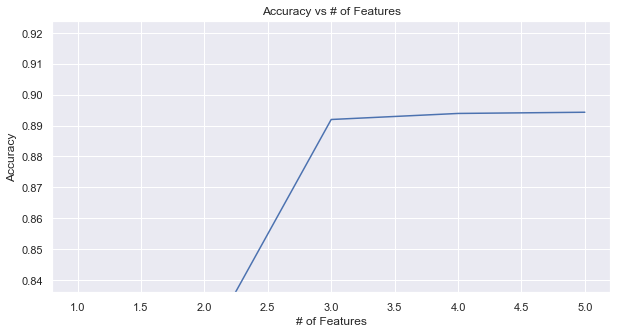

In [117]:
ax = sns.lineplot(x=list(range(1, len(rfecv.grid_scores_[1])+1)), y=list(rfecv.grid_scores_[1]))
ax.set_title("Accuracy vs # of Features")
ax.set_xlabel("# of Features")
ax.set_ylabel("Accuracy")
ax.set_ylim(.88, .88)
sns.set(rc={'figure.figsize':(10,5)})

## From the plot, what is the optimal # of features, what are these features? (2pts)

In [110]:
X_train.columns[rfecv.support_]

Index(['city', 'city_development_index', 'training_hours', 'x0_Female',
       'x0_Male', 'x0_Other', 'x0_unknown', 'x1_Has relevent experience',
       'x1_No relevent experience', 'x2_Full time course',
       'x2_Part time course', 'x2_no_enrollment', 'x2_unknown', 'x3_Graduate',
       'x3_High School', 'x3_Masters', 'x3_Phd', 'x3_Primary School',
       'x3_unknown', 'x4_Arts', 'x4_Business Degree', 'x4_Humanities',
       'x4_No Major', 'x4_Other', 'x4_STEM', 'x4_unknown',
       'x5_Early Stage Startup', 'x5_Funded Startup', 'x5_NGO', 'x5_Other',
       'x5_Public Sector', 'x5_Pvt Ltd', 'x5_unknown', 'x6_1', 'x6_2', 'x6_3',
       'x6_4', 'x6_>4', 'x6_never', 'x6_unknown', 'x7_10/49', 'x7_100-500',
       'x7_1000-4999', 'x7_10000+', 'x7_50-99', 'x7_500-999', 'x7_5000-9999',
       'x7_<10', 'x7_unknown', 'x8_1', 'x8_11', 'x8_12', 'x8_13', 'x8_14',
       'x8_15', 'x8_16', 'x8_17', 'x8_18', 'x8_19', 'x8_2', 'x8_20', 'x8_3',
       'x8_4', 'x8_5', 'x8_6', 'x8_7', 'x8_8', 'x8_<1',

In [114]:
col_count = df.shape[1]
col_count

73

In [115]:
temp_df = pd.DataFrame() 
temp_df['feature'] = X_train.columns
temp_df['rank'] = rfecv.ranking_
temp_df

,feature,rank
0,city,1
1,city_development_index,1
2,training_hours,1
3,x0_Female,1
4,x0_Male,1
...,...,...
67,x8_8,1
68,x8_9,3
69,x8_<1,1
70,x8_>20,1


## Build an SVM classifier that uses gridsearch and the selected features from RFE (3pts)

In [101]:
df2 = df[X_train.columns]
X = df2
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Train ", X_train.shape)
print("Test ", X_test.shape)

Train  (30652, 72)
Test  (7664, 72)


In [102]:
param_grid = {
    'C': [1, 10],
    'gamma': [1, 10],
    'kernel': ['rbf']
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
}

clf_grid = GridSearchCV(SVC(), param_grid, scoring=scorers, cv=4, refit='precision_score', verbose = 3)
clf_grid.fit(X_train, y_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits
[CV 1/4] END C=1, gamma=1, kernel=rbf; accuracy_score: (test=0.876) f1: (test=0.008) precision_score: (test=0.667) recall_score: (test=0.004) total time= 4.0min
[CV 2/4] END C=1, gamma=1, kernel=rbf; accuracy_score: (test=0.875) f1: (test=0.004) precision_score: (test=0.286) recall_score: (test=0.002) total time= 3.3min
[CV 3/4] END C=1, gamma=1, kernel=rbf; accuracy_score: (test=0.876) f1: (test=0.008) precision_score: (test=0.800) recall_score: (test=0.004) total time= 3.4min
[CV 4/4] END C=1, gamma=1, kernel=rbf; accuracy_score: (test=0.875) f1: (test=0.008) precision_score: (test=0.500) recall_score: (test=0.004) total time= 3.1min
[CV 1/4] END C=1, gamma=10, kernel=rbf; accuracy_score: (test=0.876) f1: (test=0.008) precision_score: (test=0.667) recall_score: (test=0.004) total time= 3.3min
[CV 2/4] END C=1, gamma=10, kernel=rbf; accuracy_score: (test=0.875) f1: (test=0.000) precision_score: (test=0.000) recall_score: (tes

GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'C': [1, 10], 'gamma': [1, 10], 'kernel': ['rbf']},
             refit='precision_score',
             scoring={'accuracy_score': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score),
                      'precision_score': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score)},
             verbose=3)

## Compare Results of Baseline and using the Feature Selection Method, why do you think one performed better over the other? What would be your recommendation to improve the model performance? (5pts)

In [103]:
y_pred = clf_grid.best_estimator_.predict(X_test)
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

0.5555555555555556
0.005235602094240838
0.010373443983402491
0.8755219206680585


``Based on the accuracy, precision, recall, and f1-score, the second run with the selected features showed the similar values. However, the second SVM classification performed faster because of the application of RFECV elimination method as a preprocessing step where most features were not included in the gridsearch algorithm. The classification became much robust as lesser points within the same gamma values was classified in a slightly shorter time complexity. As a recommendation, much emphasis is given for the dataset as it may require much preprocessing. The number of overall observation can be further reduced. Also, a possible model development alternative is the randomsearch algorithm as it only has a big O of nlog(n) vs. gridsearch's exponential time complexity``